In [67]:
import sklearn
from sklearn import tree, datasets
from sklearn.tree import export_text
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [44]:
# Load Dataset
data_bc = sklearn.datasets.load_breast_cancer()
# Splitting Data Sets (80% training, 20% scoring/validating/testing)
x, y = data_bc.data, data_bc.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 420)

In [62]:
# DecisionTreeClassifier (Breast Cancer)
clf_dtc_bc = sklearn.tree.DecisionTreeClassifier() # Classifier DecisionTreeClassifier for Breast Cancer
clf_dtc_bc = clf_dtc_bc.fit(x_train, y_train)
clf_dtc_bc.score(x_test, y_test)

0.9210526315789473

[Text(243.0519230769231, 203.85, 'X[22] <= 114.45\ngini = 0.463\nsamples = 455\nvalue = [166, 289]'),
 Text(189.9346153846154, 176.67000000000002, 'X[27] <= 0.16\ngini = 0.185\nsamples = 320\nvalue = [33, 287]'),
 Text(122.33076923076923, 149.49, 'X[13] <= 33.005\ngini = 0.112\nsamples = 303\nvalue = [18, 285]'),
 Text(64.38461538461539, 122.31, 'X[27] <= 0.132\ngini = 0.037\nsamples = 266\nvalue = [5, 261]'),
 Text(25.753846153846155, 95.13, 'X[21] <= 33.27\ngini = 0.008\nsamples = 246\nvalue = [1, 245]'),
 Text(12.876923076923077, 67.94999999999999, 'gini = 0.0\nsamples = 230\nvalue = [0, 230]'),
 Text(38.63076923076923, 67.94999999999999, 'X[27] <= 0.092\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(25.753846153846155, 40.77000000000001, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(51.50769230769231, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(103.01538461538462, 95.13, 'X[21] <= 29.06\ngini = 0.32\nsamples = 20\nvalue = [4, 16]'),
 Text(90.13

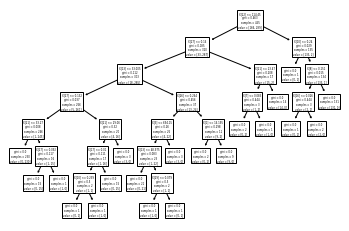

In [84]:
# DecisionTreeClassifier Plot
tree.plot_tree(clf_dtc_bc)

In [105]:
# Export DecicisionTreeClassifier as Text
r = tree.export_text(clf_dtc_bc, feature_names = data_bc.feature_names)
print(r) #????? napa gabisa feature name nya????

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [72]:
# Predicting using DecisionTreeClassifer previously made for Breast Cancer
y_pred = clf_dtc_bc.predict(x_test) # Predicted by classifier
y_true = y_test

In [73]:
# Scoring DecisionTreeClassifier for Breast Cancer (Accuracy)
accuracy_score(y_true, y_pred)

0.9210526315789473

In [80]:
# Scoring DecisionTreeClassifier for Breat Cancer (F1)
f1_score(y_true, y_pred, pos_label = 1)

0.9343065693430658